# ITMAL Exercise

REVISIONS| |
---------| |
2018-0318| CEF, initial.
2018-0321| CEF, synced with MLP moon exercise.
2018-0323| CEF, minor updated and spell checked.
2019-0930| CEF, updated for ITMAL E19.


## Keras Multi-Layer Perceptrons (MLP's) on MNIST-data


### Qa Using a Keras MLP on the MNIST-data

Now, make a Keras `Sequential` model and fit it to the MNIST data, re-using as much of the code form the `mlp_moon.ipynb` as you can.

Then try to change the number of hidden layers and the neurons in each layer, looking for increases in test accuracy via ``score``. 

Publish your best score for your model in Blackboard, see link under L06. We use categorical accuracy for score---eventhough a $F_1$ score could say more. Publish you result like
```
   ITMALGrpXY: score=0.76, a 10-20-30-20-10 MLP, takes looong to train
```
or similar


NOTE: you probably need to scale/normalize the MNIST data before a fit, and no 2D-decision boundaries can be drawn from the 784-dimension MNIST data.

In [1]:
#Function to load MNIST data.
def MNIST_GetDataSet():
    # Load data from https://www.openml.org/d/554
    X, y = fetch_openml('mnist_784', version=1 ,return_X_y=True)
    return X,y


In [2]:
import numpy as np
from time import time
from sklearn.datasets import fetch_openml

# Loading The MNIST dataset

#Fetching MNIST data from skillshare with own function.
start = time()
X,y = MNIST_GetDataSet()
t = time()-start

print(f"OK, Load time={t:0.1f}")


OK, Load time=83.2


Changing the range of the pixel value from 0 to 255 to 0 to 1. Because the neurons and activation functions are operating in the range between 0 and 1.

In [4]:
print(X)

# Changing the range of the pixel value to 0 to 1. 
X1=X/255

print(X[0])
print(X1[0])



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   

In [4]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Splitting Data
# Make data
start = time()
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)
t = time()-start

# Controls the dimention of the train/test arrays.
assert y.ndim==1                     
assert y_train_binary.ndim==2       
assert y_test_binary.ndim ==2       

print(f"OK, Split time={t:0.1f}")
print(X_train[0])


Using TensorFlow backend.


OK, Split time=2.4
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

#from sklearn import datasets

np.random.seed(42)

# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=784, units=2000, activation="tanh", kernel_initializer="normal"))
model.add(Dense(1000,activation='tanh'))
model.add(Dense(500,activation='tanh'))
model.add(Dense(units=10, activation="softmax"))

optimizer = SGD(lr=0.01)
#optimizer = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Train
VERBOSE     = 0
EPOCHS      = 35

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start

print(f"OK, training time={t:0.1f}")

OK, training time=1933.5


Training time: 1933.5 sec
Test loss:     0.08383155212781969
Test accuracy: 0.9739523809523809
All scores in history: [0.08383155212781969, 0.9739523809523809, 0.0038726767958377466, 0.0072450248341830005]


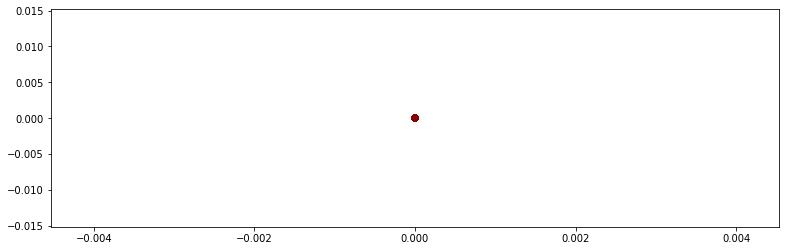

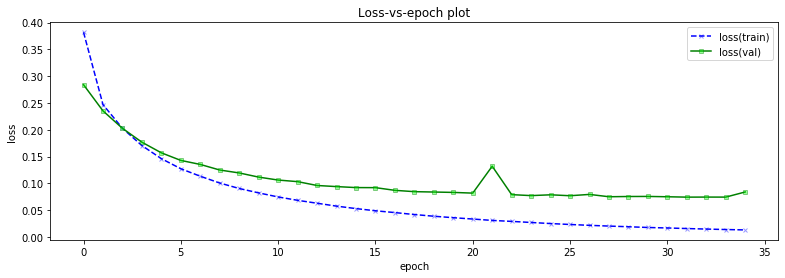

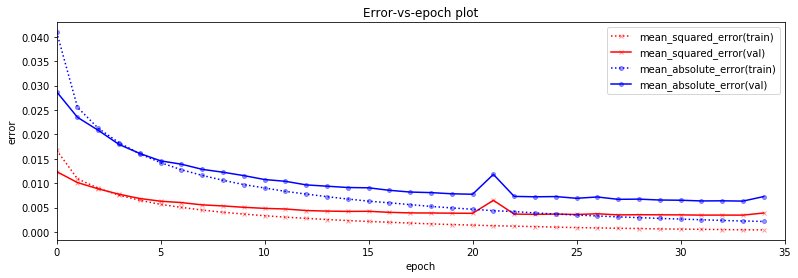

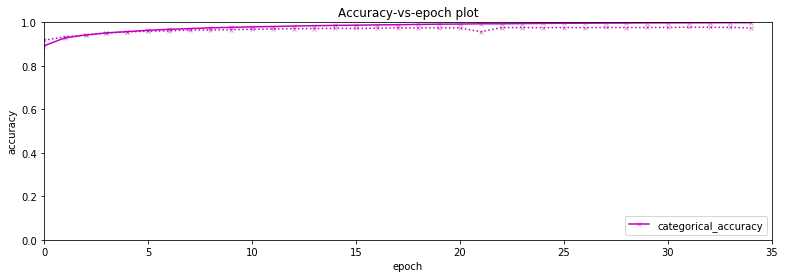

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#print(history.history)
score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}") # loss is score 0 by definition?
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

In [20]:
# TEST 1:
# Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=20, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(units=10, activation="softmax"))

# #optimizer = SGD(lr=0.1)
# optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 50

# Training time: 527.9 sec
# Test loss:     0.22195826129615306
# Test accuracy: 0.943
# All scores in history: [0.22195826129615306, 0.943, 0.009008236024033977, 0.014796660615840838]
    
    
# # TEST 2:
# # Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=20, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(units=10, activation="softmax"))

# optimizer = SGD(lr=0.01)
# #optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 50

# Training time: 232.0 sec
# Test loss:     0.17488471111797152
# Test accuracy: 0.9501428571428572
# All scores in history: [0.17488471111797152, 0.9501428571428572, 0.0076049974263268745, 0.016699722670373462]




# # TEST 3
# # Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=200, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(100,activation='tanh'))
# model.add(Dense(20,activation='tanh'))
# model.add(Dense(units=10, activation="softmax"))

# optimizer = SGD(lr=0.01)
# #optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 35

# Training time: 279.0 sec
# Test loss:     0.10130165741024982
# Test accuracy: 0.9695714285714285
# All scores in history: [0.10130165741024982, 0.9695714285714285, 0.0046379666870295, 0.009067855959669465]

# # TEST 4
# # Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=1000, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(600,activation='tanh'))
# model.add(Dense(100,activation='tanh'))
# model.add(Dense(units=10, activation="softmax"))

# optimizer = SGD(lr=0.01)
# #optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 10

# Training time: 227.6 sec
# Test loss:     0.13001273374472347
# Test accuracy: 0.9621428571428572
# All scores in history: [0.13001273374472347, 0.9621428571428572, 0.005777994256799242, 0.0136300406851584]



# #TEST 5
# Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=1000, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(600,activation='tanh'))
# model.add(Dense(100,activation='tanh'))
# model.add(Dense(units=10, activation="softmax"))

# optimizer = SGD(lr=0.01)
# #optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 35

# Training time: 758.5 sec
# Test loss:     0.08972824973967813
# Test accuracy: 0.9724285714285714
# All scores in history: [0.08972824973967813, 0.9724285714285714, 0.00416490629911104, 0.008350563158591588]



# # TEST 6
# # Build Keras model 
# model = Sequential()
# model.add(Dense(input_dim=784, units=2000, activation="tanh", kernel_initializer="normal"))
# model.add(Dense(1000,activation='tanh'))
# model.add(Dense(500,activation='tanh'))
# model.add(Dense(units=10, activation="softmax"))

# optimizer = SGD(lr=0.01)
# #optimizer = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', 
#               optimizer=optimizer, 
#               metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# # Train
# VERBOSE     = 0
# EPOCHS      = 35

# Training time: 1933.5 sec
# Test loss:     0.08383155212781969
# Test accuracy: 0.9739523809523809
# All scores in history: [0.08383155212781969, 0.9739523809523809, 0.0038726767958377466, 0.0072450248341830005]

### Conclusion

The hyperparameteres that gave the best accuracy was:
```python
# Build Keras model 
model = Sequential()
model.add(Dense(input_dim=784, units=2000, activation="tanh", kernel_initializer="normal"))
model.add(Dense(1000,activation='tanh'))
model.add(Dense(500,activation='tanh'))
model.add(Dense(units=10, activation="softmax"))

optimizer = SGD(lr=0.01)
#optimizer = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Train
VERBOSE     = 0
EPOCHS      = 35

Training time: 1933.5 sec
Test loss:     0.08383155212781969
Test accuracy: 0.9739523809523809
All scores in history: [0.08383155212781969, 0.9739523809523809, 0.0038726767958377466, 0.0072450248341830005]
```
And the highest accuracy was: 97




